In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import numpy as np

%matplotlib inline

In [4]:
data = pd.read_csv('bikes_train.csv') # , index_col=0 to use the datetime column as the DataFrame index
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
data.shape

(10886, 12)

In [6]:
data.isnull().values.any()

False

In [7]:
data.dropna()
data.shape

(10886, 12)

In [8]:
def transform_data(data):
    data.datetime = data.datetime.apply(pd.to_datetime)
    data['month'] = data.datetime.apply(lambda x : x.month)
    data['hour'] = data.datetime.apply(lambda x : x.hour)
    data['day'] = data.datetime.apply(lambda x : x.timetuple().tm_yday)
    data['dayofweek'] = data.datetime.apply(lambda x : x.isoweekday())
    data.head()
    
transform_data(data)

In [9]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data)

In [27]:
fit_columns = ['day']

In [36]:
model = LinearRegression(fit_intercept=False)

model_result = model.fit(train_data[fit_columns], train_data[["count"]])

In [37]:
test_predictions = model.predict(test_data[fit_columns])
test_predictions.shape

(2722, 1)

In [38]:
test_data["prediction"] = np.ravel(test_predictions)
test_data.head()

D:\lib\anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,dayofweek,prediction
5650,2012-01-10 14:00:00,1,0,1,1,17.22,21.210,38,19.9995,10,96,106,1,14,10,2,8.738574
2056,2011-05-12 14:00:00,2,0,1,2,25.42,30.305,61,15.0013,43,148,191,5,14,132,4,115.349183
5460,2012-01-02 15:00:00,1,1,0,1,11.48,12.120,38,30.0026,29,139,168,1,15,2,1,1.747715
4813,2011-11-13 15:00:00,4,0,0,2,20.50,24.240,42,22.0028,89,221,310,11,15,317,7,277.012811
2709,2011-07-01 19:00:00,3,0,1,1,31.98,33.335,25,12.9980,80,238,318,7,19,182,5,159.042055


In [39]:
print("The mean square error is %d" % np.mean((test_data["prediction"] - test_data["count"]) ** 2))

The mean square error is 37722


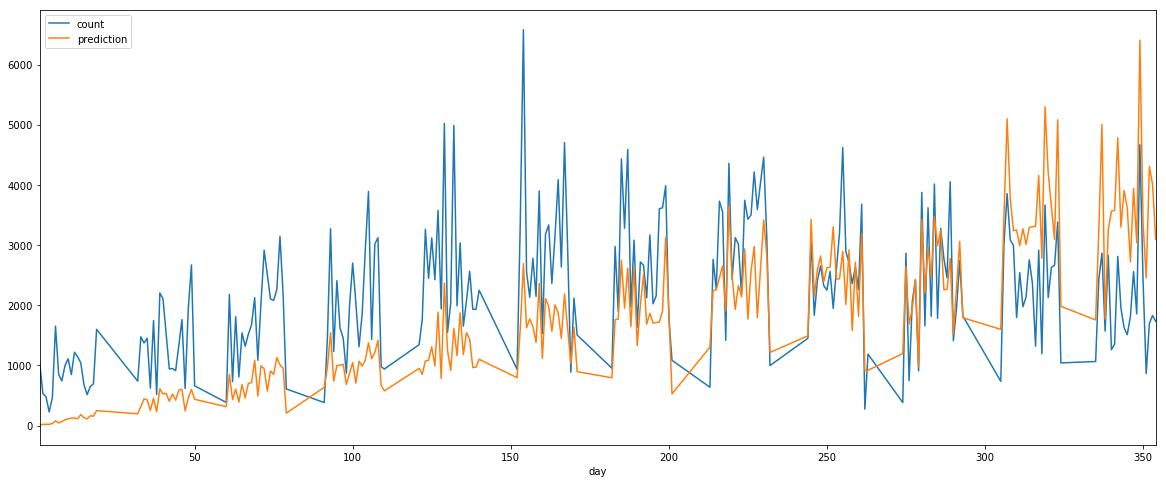

In [40]:
test_data[["day", "count", "prediction"]].groupby("day").aggregate(np.sum).plot(figsize=(20, 8))